# Company-Wise Exploratory Data Analysis

 Following topics are performed on the stock data:

* Candlestick OHLC 
* Correlation between PREVCLOSE and OPEN 
* Historgram for Closing Rates on daily change
* Pair Plot for OPEN CLOSE HIGH LOW
* HeatMap for CLOSE 
* Scatter Plot for OPEN-CLOSE-TURNOVER
* Correlation Matrix Plot
* Percent Change
* Moving Windows
* Volatility Calculation and Plot
* Compound Annual Growth Rate
* Common Financial Analysis:
    - Returns
* Maximum Drawdown

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
from datetime import datetime

In [3]:
%%time
data = pd.read_csv(r"merged.csv").drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","Unnamed: 0.1.1.1","Unnamed: 0.1.1.1.1.1", "Unnamed: 0.1.1.1.1"],axis=1)

<string>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 38.5 s


In [4]:
data.head()

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE,SC_CODE,SC_GROUP,SC_NAME,SC_TYPE,TDCLOINDI,date
0,108.35,113.50,108.00,106.00,9802583.0,89879,454,109.7,108.10,526921,B,21ST CEN.MGM,Q,NaN,01/01/08
1,148.80,149.85,148.80,147.00,48747812.0,328901,2531,148.0,145.75,532628,B1,3I INFOTECH,Q,NaN,01/01/08
2,2291.60,2325.00,2285.00,2280.00,1162223.0,504,61,2325.0,2300.35,523395,B1,3M INDIA LTD,Q,NaN,01/01/08
3,97.11,97.50,97.11,97.11,788476.0,8110,19,97.2,97.28,990001,F,6.75% US-64,B,NaN,01/01/08
4,412.35,419.95,413.00,365.00,14677692.0,39681,57,370.0,401.25,530499,B,A.K.CAPITAL,Q,NaN,01/01/08


In [5]:
data.tail()

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE,SC_CODE,SC_GROUP,SC_NAME,SC_TYPE,TDCLOINDI,date
9504036,5100.0,5100.0,5100.0,5099.99,30599.0,6,2,5099.99,5050.00,972714,F,IFCI150212B,B,NaN,31/12/19
9504037,5000.0,5001.0,5000.0,5000.00,25001.0,5,2,5001.00,5000.03,972716,F,IFCI150212D,B,NaN,31/12/19
9504038,7850.0,7900.0,7850.0,7727.10,124867.0,16,6,7727.10,7727.00,972719,F,IFCI310312A,B,NaN,31/12/19
9504039,8550.0,8550.0,8550.0,8202.00,49908.0,6,3,8202.00,8651.00,972721,F,IFCI310312C,B,NaN,31/12/19
9504040,9555.5,9555.5,9555.5,9555.18,57331.0,6,2,9555.18,9553.34,972885,F,893PTCIF22A,B,NaN,31/12/19


In [6]:
%%time
data.shape[0]

Wall time: 0 ns


9504041

In [7]:
%%time
data.index = data['date'].sort_index()

Wall time: 349 ms


In [8]:
ls = list(data['SC_NAME'].unique())

In [9]:
ls

['21ST CEN.MGM',
 '3I INFOTECH ',
 '3M INDIA LTD',
 '6.75% US-64 ',
 'A.K.CAPITAL ',
 'A.SARABHAI  ',
 'A.V.COTTEX  ',
 'AAREY DRUGS ',
 'AARTI DRUGS ',
 'AARTI INDUST',
 'AARVEE DENIM',
 'ABAN OFFSHO ',
 'ABB LTD.    ',
 'ABBOTT (I)  ',
 'ABC INDIA   ',
 'ABG HEAVY IN',
 'ABG SHIPYARD',
 'ABHINAV CAP ',
 'ABHISHEK IND',
 'ABL BIO-TECH',
 'ABM KNOWLEDG',
 'ACC LTD     ',
 'ACCEL FRONTL',
 'ACCEL TRANS ',
 'ACCENT TECH ',
 'ACCURATE TRA',
 'ACE INDIA LT',
 'ACE SOFTWARE',
 'ACI INFOCOM ',
 'ACKNIT KNIT.',
 'ACROW INDIA ',
 'ACRYCIL LTD.',
 'ACTION CONST',
 'ACTION FIN. ',
 'ADANI ENTER ',
 'ADARSH DERI.',
 'ADARSH PLANT',
 'ADDI IND.   ',
 'ADF FOODS LT',
 'ADHUNIK MET ',
 'ADI BIR NUVO',
 'ADITYA FORGE',
 'ADITYA ISPAT',
 'ADLABS FILMS',
 'AD-MANUM FIN',
 'ADOR FONTECH',
 'ADORWELDING ',
 'ADVANCE TECH',
 'ADVANCED MIC',
 'ADVANI HOTEL',
 'ADVANTA     ',
 'ADVENT COMP.',
 'ADVIK LABORS',
 'AEGIS LOGIS ',
 'AEKTA LTD.  ',
 'AEONIAN PUB ',
 'AFTEK LTD   ',
 'AGRO DUTCH I',
 'AGRO TECH FO

### Group A

In [10]:
rslt_df = data[data['SC_GROUP'] == 'A ']
print(rslt_df)

            CLOSE     HIGH     LAST      LOW   NET_TURNOV  NO_OF_SHRS  \
date                                                                    
01/01/08  1510.95  1528.00  1510.95  1501.00   30017951.0       19866   
01/01/08   587.90   588.95   587.90   577.00    4594295.0        7858   
01/01/08  1028.10  1038.80  1028.10  1020.00   62480034.0       60668   
01/01/08  1206.30  1206.30  1206.30  1175.00  140314172.0      116641   
01/01/08  2028.05  2050.00  2028.05  2000.00   65821223.0       32542   
...           ...      ...      ...      ...          ...         ...   
31/12/19  3196.50  3240.00  3196.50  3183.00   52730878.0       16414   
31/12/19  1976.90  2000.00  2000.00  1916.35   13567223.0        6916   
31/12/19   162.70   164.30   162.70   155.50   59404969.0      367732   
31/12/19    77.10    77.60    77.10    74.85  136728380.0     1776465   
31/12/19    63.00    64.05    63.00    62.85    3282675.0       51703   

          NO_TRADES     OPEN  PREVCLOSE  SC_CODE S

In [11]:
from datetime import date

In [12]:
date(day=1,month=1,year=2008)

datetime.date(2008, 1, 1)

In [13]:
rslt_df.index.dtype

dtype('O')

In [14]:
rslt_df['date']=pd.to_datetime(rslt_df['date'], format='%d/%m/%y')

C:\Users\Dharamveer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
rslt_df.index = rslt_df['date']

In [16]:
rslt_df

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE,SC_CODE,SC_GROUP,SC_NAME,SC_TYPE,TDCLOINDI,date
date,,,,,,,,,,,,,,,
2008-01-01,1510.95,1528.00,1510.95,1501.00,30017951.0,19866,837,1528.00,1512.35,500002,A,ABB LTD.,Q,NaN,2008-01-01
2008-01-01,587.90,588.95,587.90,577.00,4594295.0,7858,132,584.95,580.85,500488,A,ABBOTT (I),Q,NaN,2008-01-01
2008-01-01,1028.10,1038.80,1028.10,1020.00,62480034.0,60668,2071,1035.00,1024.50,500410,A,ACC LTD,Q,NaN,2008-01-01
2008-01-01,1206.30,1206.30,1206.30,1175.00,140314172.0,116641,1071,1206.30,1148.90,512599,A,ADANI ENTER,Q,NaN,2008-01-01
2008-01-01,2028.05,2050.00,2028.05,2000.00,65821223.0,32542,474,2000.00,2017.25,500303,A,ADI BIR NUVO,Q,NaN,2008-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,3196.50,3240.00,3196.50,3183.00,52730878.0,16414,2538,3240.00,3232.50,541729,A,HDFCAMC,Q,NaN,2019-12-31
2019-12-31,1976.90,2000.00,2000.00,1916.35,13567223.0,6916,1223,1916.35,1923.35,541988,A,AAVAS,Q,NaN,2019-12-31
2019-12-31,162.70,164.30,162.70,155.50,59404969.0,367732,5165,155.50,155.75,542066,A,ADANIGAS,Q,NaN,2019-12-31


In [17]:
start_date = date(day=1,month=1,year=2019)
end_date = date(day=31,month=1,year=2019)

In [18]:
one_month_data = rslt_df[(start_date <= rslt_df['date']) & (rslt_df['date'] <= end_date) ]

C:\Users\Dharamveer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [19]:
one_month_data

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE,SC_CODE,SC_GROUP,SC_NAME,SC_TYPE,TDCLOINDI,date
date,,,,,,,,,,,,,,,
2019-01-01,1320.40,1338.75,1323.55,1312.55,2407362.0,1816,255,1318.20,1332.00,500002,A,ABB LTD.,Q,NaN,2019-01-01
2019-01-01,203.90,205.70,203.90,200.60,1150504.0,5672,294,204.75,204.20,500003,A,AEGIS LOGIS,Q,NaN,2019-01-01
2019-01-01,739.65,747.50,739.65,737.60,5424260.0,7307,253,743.45,742.75,500008,A,AMAR RAJA BA,Q,NaN,2019-01-01
2019-01-01,2009.60,2018.60,2009.60,1956.00,630395875.0,320697,2531,1973.55,1970.00,500010,A,HDFC,Q,NaN,2019-01-01
2019-01-01,3448.60,3548.00,3443.00,3416.45,9821508.0,2837,651,3548.00,3430.35,500027,A,ATUL LTD.,Q,NaN,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,136.45,139.50,136.45,135.05,915266.0,6703,284,139.50,139.35,540767,A,RNAM,Q,NaN,2019-01-31
2019-01-31,174.00,177.50,175.00,172.55,259629.0,1492,120,175.60,173.60,540769,A,NIACL,Q,NaN,2019-01-31
2019-01-31,371.10,374.70,373.20,363.65,16257402.0,43937,1195,373.00,370.75,540777,A,HDFCLIFE,Q,NaN,2019-01-31


In [20]:
#Choosing one company
Company_x = one_month_data[one_month_data['SC_NAME']=='ABB LTD.    ']

In [21]:
Company_x_Name=Company_x['SC_NAME'].unique()
Company_x_Name

array(['ABB LTD.    '], dtype=object)

In [22]:
Company_x = Company_x.drop(["SC_CODE","SC_GROUP","SC_TYPE","TDCLOINDI","SC_NAME"],axis=1)

In [23]:
len(Company_x)

23

## 1) Candlestick OHLC Plot

In [24]:
Candlestick = Company_x.drop(["NET_TURNOV","NO_OF_SHRS","NO_TRADES","PREVCLOSE"],axis=1)

In [25]:
Candlestick

,CLOSE,HIGH,LAST,LOW,OPEN,date
date,,,,,,
2019-01-01,1320.40,1338.75,1323.55,1312.55,1318.20,2019-01-01
2019-01-02,1316.00,1327.25,1316.00,1313.75,1314.40,2019-01-02
2019-01-03,1312.35,1330.15,1308.00,1305.25,1318.95,2019-01-03
2019-01-04,1305.00,1315.55,1301.15,1299.00,1312.30,2019-01-04
2019-01-07,1299.85,1317.60,1299.85,1294.30,1315.00,2019-01-07
2019-01-08,1297.00,1309.00,1295.05,1294.00,1300.05,2019-01-08
2019-01-09,1300.80,1311.85,1295.00,1294.10,1306.00,2019-01-09
2019-01-10,1299.70,1309.00,1303.00,1295.95,1296.00,2019-01-10
2019-01-11,1346.65,1359.00,1346.65,1302.35,1302.35,2019-01-11


In [26]:
len(Candlestick)

23

In [27]:
import datetime as dt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

C:\Users\Dharamveer\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [28]:
from matplotlib.dates import date2num

In [29]:
%%time
Candlestick['date']=Candlestick['date'].astype('datetime64[D]')
Candlestick['date'] = Candlestick['date'].map(mdates.date2num)

Wall time: 11 ms


In [30]:
Candlestick=Candlestick[['date','OPEN','HIGH','LOW','CLOSE']]

In [31]:
Candlestick

,date,OPEN,HIGH,LOW,CLOSE
date,,,,,
2019-01-01,737060.0,1318.20,1338.75,1312.55,1320.40
2019-01-02,737061.0,1314.40,1327.25,1313.75,1316.00
2019-01-03,737062.0,1318.95,1330.15,1305.25,1312.35
2019-01-04,737063.0,1312.30,1315.55,1299.00,1305.00
2019-01-07,737066.0,1315.00,1317.60,1294.30,1299.85
2019-01-08,737067.0,1300.05,1309.00,1294.00,1297.00
2019-01-09,737068.0,1306.00,1311.85,1294.10,1300.80
2019-01-10,737069.0,1296.00,1309.00,1295.95,1299.70
2019-01-11,737070.0,1302.35,1359.00,1302.35,1346.65


In [32]:
ohlc_data_limited=Candlestick[(Candlestick.index>=np.datetime64('2019-01-01'))&(Candlestick.index<=np.datetime64('2019-12-31'))]

In [33]:
ohlc_data_limited

,date,OPEN,HIGH,LOW,CLOSE
date,,,,,
2019-01-01,737060.0,1318.20,1338.75,1312.55,1320.40
2019-01-02,737061.0,1314.40,1327.25,1313.75,1316.00
2019-01-03,737062.0,1318.95,1330.15,1305.25,1312.35
2019-01-04,737063.0,1312.30,1315.55,1299.00,1305.00
2019-01-07,737066.0,1315.00,1317.60,1294.30,1299.85
2019-01-08,737067.0,1300.05,1309.00,1294.00,1297.00
2019-01-09,737068.0,1306.00,1311.85,1294.10,1300.80
2019-01-10,737069.0,1296.00,1309.00,1295.95,1299.70
2019-01-11,737070.0,1302.35,1359.00,1302.35,1346.65


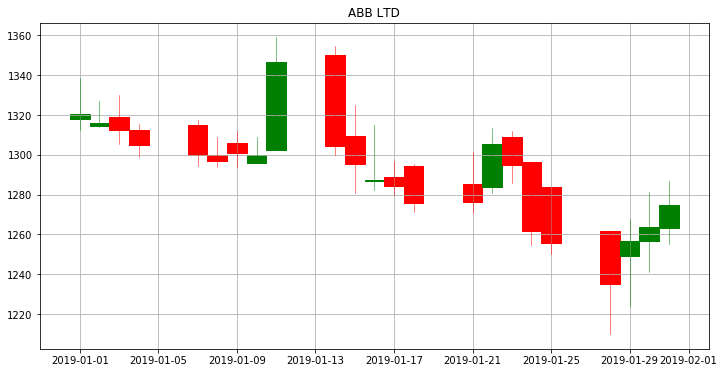

In [34]:
#for x in range(len(np.arange(start_date,end_date,dtype='datetime64[M]'))-1):
 #   dates=np.arange(start_date,end_date,dtype='datetime64[M]')
  #  for i in range(len(Candlestick['SC_NAME'].unique())):
       # ohlc_data_limited=Candlestick[(Candlestick.index>=np.datetime64(str(dates[x])+'-01'))&(Candlestick.index<np.datetime64(str(dates[x+1])+'-01'))&(Candlestick['SC_NAME']==df['SC_NAME'].unique()[i])][['date','OPEN','HIGH','LOW','CLOSE']]
   #     if ohlc_data_limited.shape[0]!=0:
plt.figure(figsize=(12,6))
ax = plt.subplot()
candlestick_ohlc(ax , ohlc_data_limited.values,width=1.0,colorup='g',colordown='r')
ax.xaxis_date()
ax.grid(True)
plt.title('ABB LTD')
plt.savefig("F:/Candlestickplot.png")
plt.show()
#break

## 2) Correlation between PrevClose and Open

In [35]:
Correlation = Company_x.drop(["CLOSE","HIGH","LAST","LOW","NET_TURNOV","NO_OF_SHRS","NO_TRADES"],axis=1)

In [36]:
Correlation

,OPEN,PREVCLOSE,date
date,,,
2019-01-01,1318.20,1332.00,2019-01-01
2019-01-02,1314.40,1320.40,2019-01-02
2019-01-03,1318.95,1316.00,2019-01-03
2019-01-04,1312.30,1312.35,2019-01-04
2019-01-07,1315.00,1305.00,2019-01-07
2019-01-08,1300.05,1299.85,2019-01-08
2019-01-09,1306.00,1297.00,2019-01-09
2019-01-10,1296.00,1300.80,2019-01-10
2019-01-11,1302.35,1299.70,2019-01-11


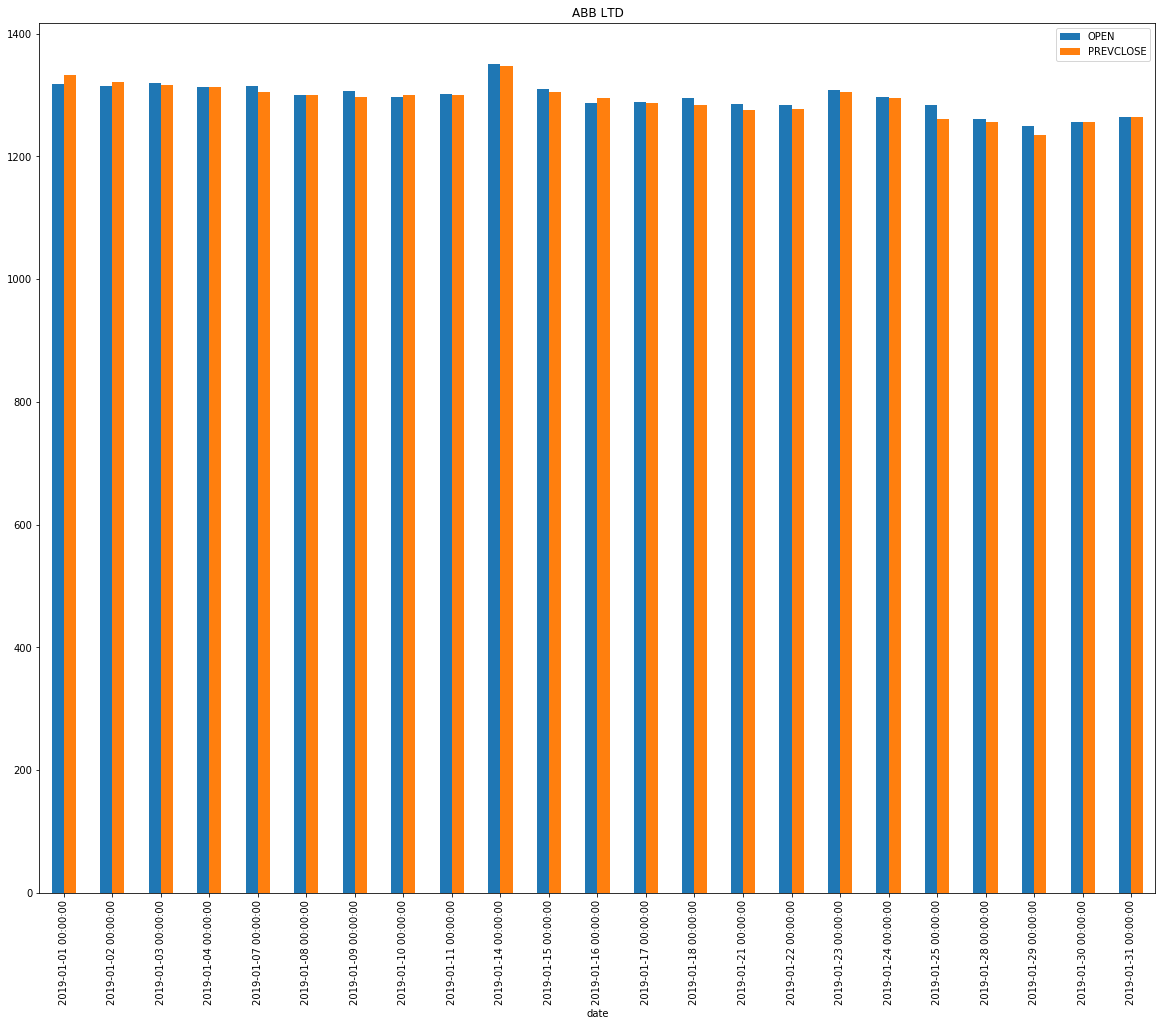

In [37]:
Company_x.plot(kind="bar",x="date",y=["OPEN","PREVCLOSE"],figsize=(20,16),title='ABB LTD''')

In [38]:
#Correlation.plot(kind="bar",x='date',y=["OPEN","PREVCLOSE"],figsize=(20,16),title=x)

## 3) Historgram for Closing Rates on daily change


In [44]:
import pylab as pl

<Figure size 432x288 with 0 Axes>

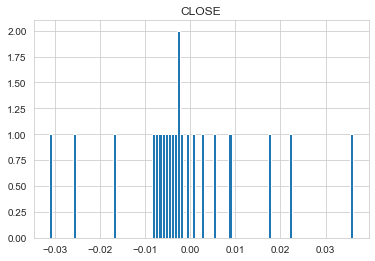

In [45]:
#for i in list_A:
Histogram = Company_x.sort_index()[["CLOSE"]]
percentage_change = Histogram.pct_change()
if Histogram.shape[0]!=0:
#print(i,percentage_change.head())
    pl.suptitle('ABB LTD')
    percentage_change.hist(bins=100,);
    plt.savefig("F:/Histoogram.png")
    plt.show()
#break
    
    

## 4) Pair Plot

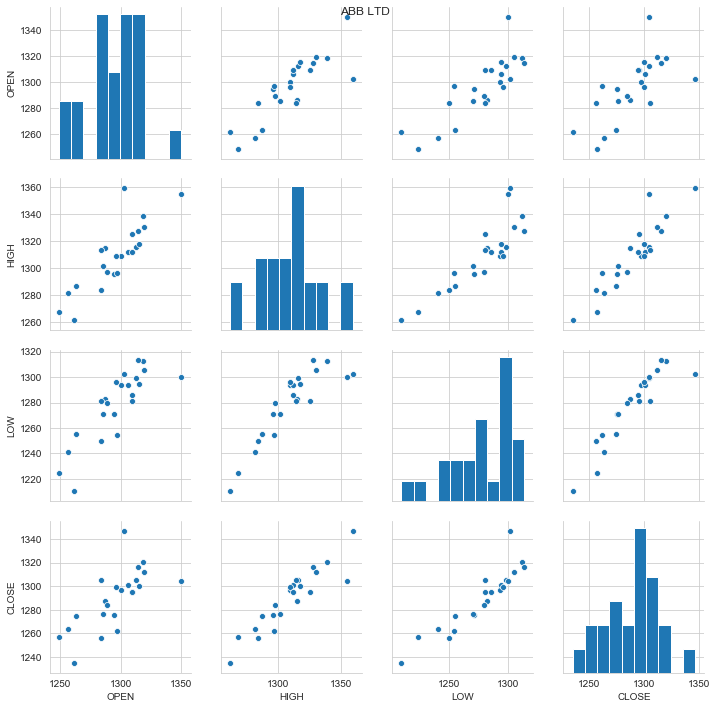

<Figure size 432x288 with 0 Axes>

In [46]:
PairPlot = Company_x.sort_index()[["OPEN","HIGH","LOW","CLOSE"]]
if PairPlot.shape[0]!=0:
        
    pair_plot = sns.pairplot(PairPlot)
    pair_plot.fig.suptitle('ABB LTD')
    plt.show()
    plt.savefig("F:/PairPlot.png")
#break

## 5) Heatmap

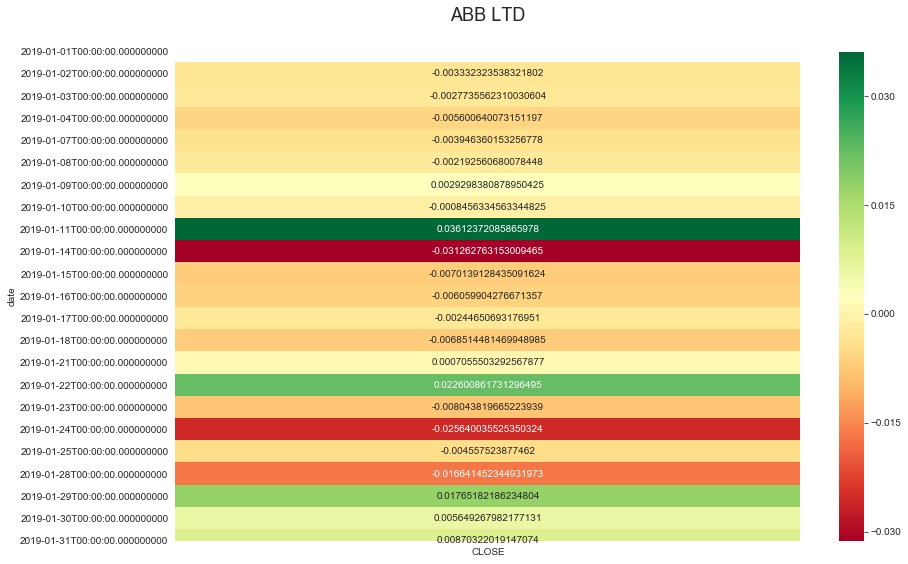

<Figure size 432x288 with 0 Axes>

In [47]:
HeatMap = Company_x.sort_index()[["CLOSE"]]
percentage_change = HeatMap.pct_change()
if HeatMap.shape[0]!=0:
    fig, ax = plt.subplots(figsize=(14,9))
    plt.title('ABB LTD',fontsize=18)
    ax.title.set_position([0.5,1.05])
    ax.set_xticks([])
    sns.heatmap(percentage_change, annot=True, fmt="", cmap='RdYlGn', ax=ax,)
    plt.show()
    plt.savefig("F:/Heatmap.png")
#break

## 6) Scatter Plot for OPEN-CLOSE-TURNOVER

In [48]:
from mpl_toolkits.mplot3d import Axes3D

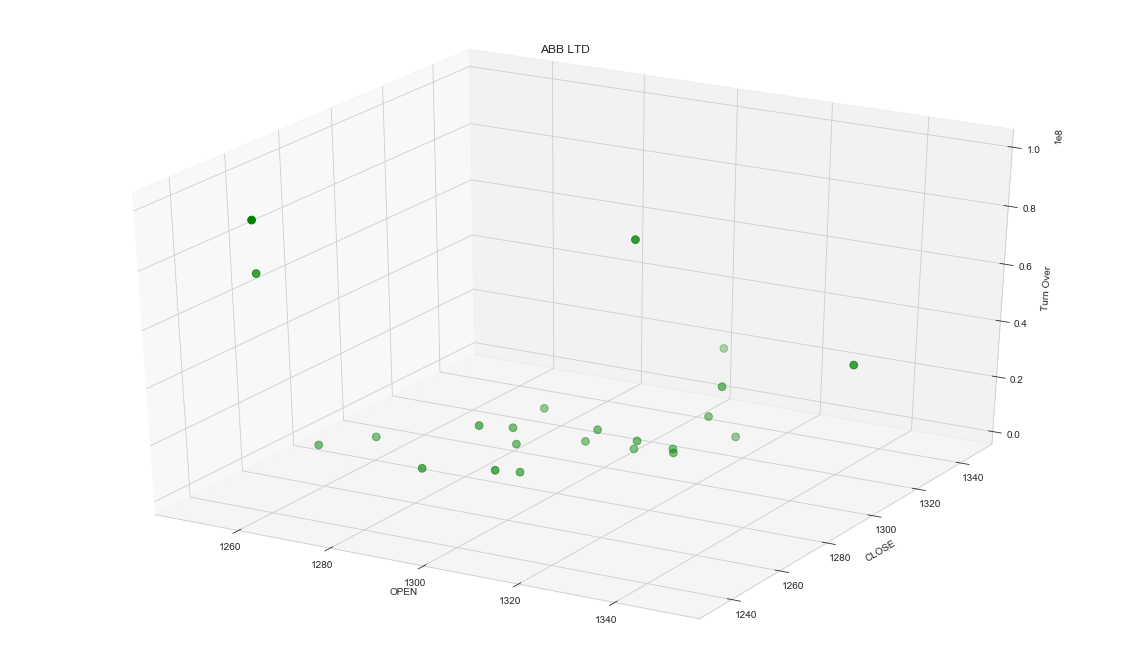

In [49]:
Scatter_x = Company_x.sort_index()["OPEN"].values
Scatter_y = Company_x.sort_index()["CLOSE"].values
Scatter_z = Company_x.sort_index()["NET_TURNOV"].values
   
fig = plt.figure(figsize=(20,12))

ax= fig.add_subplot(111,projection='3d')
ax.scatter(Scatter_x,Scatter_y,Scatter_z,c='green',s=60)
ax.set_xlabel('OPEN')
ax.set_ylabel('CLOSE')
ax.set_zlabel('Turn Over')
plt.title('ABB LTD')
plt.savefig("F:/OpenCloseTurnover.png")
##ax.view_init(27,200)
plt.show()#
#break

## 7) Correlation Matrix Plot

In [50]:
start_date = date(day=1,month=1,year=2019)
end_date = date(day=30,month=6,year=2019)

In [51]:
six_months_data = rslt_df[(start_date <= rslt_df['date']) & (rslt_df['date'] <= end_date) ]

In [52]:
Company_x = six_months_data[six_months_data['SC_NAME']=='ABB LTD.    ']

In [53]:
Company_x = Company_x.drop(["SC_CODE","SC_GROUP","SC_TYPE","TDCLOINDI","SC_NAME","date"],axis=1)

In [54]:
Company_x

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
date,,,,,,,,,
2019-01-01,1320.40,1338.75,1323.55,1312.55,2407362.0,1816,255,1318.20,1332.00
2019-02-01,1268.55,1294.30,1268.55,1264.60,7958777.0,6203,479,1273.25,1274.90
2019-03-01,1240.50,1259.50,1240.50,1232.50,72530075.0,58111,1510,1245.00,1229.95
2019-04-01,1313.55,1326.60,1310.05,1306.35,10248104.0,7785,548,1319.85,1319.85
2019-01-02,1316.00,1327.25,1316.00,1313.75,10747936.0,8148,736,1314.40,1320.40
...,...,...,...,...,...,...,...,...,...
2019-01-30,1263.90,1281.40,1263.90,1241.10,7547936.0,5965,612,1256.80,1256.80
2019-04-30,1473.40,1486.45,1473.40,1468.45,40640961.0,27577,284,1478.05,1477.50
2019-05-30,1578.45,1584.75,1579.00,1563.20,2790383.0,1771,287,1584.60,1582.55


In [55]:
Company_x["OPEN"][0]

1318.2

In [56]:
Company_x["OPEN"][20]

1480.0

In [57]:
Correlation_for_Company_x = Company_x.corr()
Correlation_for_Company_x

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
CLOSE,1.000000,0.994751,0.999329,0.991231,0.063094,-0.023718,0.169525,0.981454,0.982600
HIGH,0.994751,1.000000,0.993795,0.991057,0.063315,-0.023729,0.192333,0.988897,0.988794
LAST,0.999329,0.993795,1.000000,0.990506,0.059317,-0.027127,0.166422,0.980538,0.981985
LOW,0.991231,0.991057,0.990506,1.000000,0.059005,-0.028390,0.101273,0.992774,0.993164
NET_TURNOV,0.063094,0.063315,0.059317,0.059005,1.000000,0.991368,0.318880,0.068446,0.058053
NO_OF_SHRS,-0.023718,-0.023729,-0.027127,-0.028390,0.991368,1.000000,0.296533,-0.017417,-0.028341
NO_TRADES,0.169525,0.192333,0.166422,0.101273,0.318880,0.296533,1.000000,0.106138,0.101815
OPEN,0.981454,0.988897,0.980538,0.992774,0.068446,-0.017417,0.106138,1.000000,0.997838
PREVCLOSE,0.982600,0.988794,0.981985,0.993164,0.058053,-0.028341,0.101815,0.997838,1.000000


In [58]:
Correlation_for_Company_x.describe()

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.684252,0.687690,0.682752,0.676736,0.297942,0.237686,0.272546,0.677630,0.675101
std,0.463541,0.461016,0.464992,0.475738,0.404446,0.442445,0.284253,0.470042,0.474639
min,-0.023718,-0.023729,-0.027127,-0.028390,0.058053,-0.028390,0.101273,-0.017417,-0.028341
25%,0.169525,0.192333,0.166422,0.101273,0.059317,-0.027127,0.106138,0.106138,0.101815
50%,0.982600,0.988897,0.981985,0.991057,0.063315,-0.023718,0.169525,0.981454,0.982600
75%,0.994751,0.993795,0.993795,0.992774,0.318880,0.296533,0.296533,0.992774,0.993164
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
from string import ascii_letters
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(Correlation_for_Company_x, dtype=np.bool))

In [61]:
Correlation_for_Company_x.style.background_gradient(cmap='coolwarm').set_precision(2)

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
CLOSE,1,0.99,1,0.99,0.063,-0.024,0.17,0.98,0.98
HIGH,0.99,1,0.99,0.99,0.063,-0.024,0.19,0.99,0.99
LAST,1,0.99,1,0.99,0.059,-0.027,0.17,0.98,0.98
LOW,0.99,0.99,0.99,1,0.059,-0.028,0.1,0.99,0.99
NET_TURNOV,0.063,0.063,0.059,0.059,1,0.99,0.32,0.068,0.058
NO_OF_SHRS,-0.024,-0.024,-0.027,-0.028,0.99,1,0.3,-0.017,-0.028
NO_TRADES,0.17,0.19,0.17,0.1,0.32,0.3,1,0.11,0.1
OPEN,0.98,0.99,0.98,0.99,0.068,-0.017,0.11,1,1
PREVCLOSE,0.98,0.99,0.98,0.99,0.058,-0.028,0.1,1,1


## 8) Percent Change

In [62]:
PercentChange=Company_x.pct_change(periods=1)*100

In [63]:
PercentChange

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
date,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,-3.926840,-3.320261,-4.155491,-3.653194,230.601588,241.574890,87.843137,-3.409953,-4.286787
2019-03-01,-2.211186,-2.688712,-2.211186,-2.538352,811.321865,836.820893,215.240084,-2.218732,-3.525767
2019-04-01,5.888755,5.327511,5.606610,5.991886,-85.870545,-86.603225,-63.708609,6.012048,7.309240
2019-01-02,0.186517,0.048997,0.454181,0.566464,4.877312,4.662813,34.306569,-0.412926,0.041671
...,...,...,...,...,...,...,...,...,...
2019-01-30,-20.135225,-19.962523,-20.135225,-21.172473,165.974029,233.986562,148.780488,-21.203762,-20.951003
2019-04-30,16.575678,16.002029,16.575678,18.318427,438.438071,362.313495,-53.594771,17.604233,17.560471
2019-05-30,7.129768,6.613071,7.167097,6.452382,-93.134062,-93.577982,1.056338,7.208822,7.109983


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184517D3D48>,
      dtype=object)

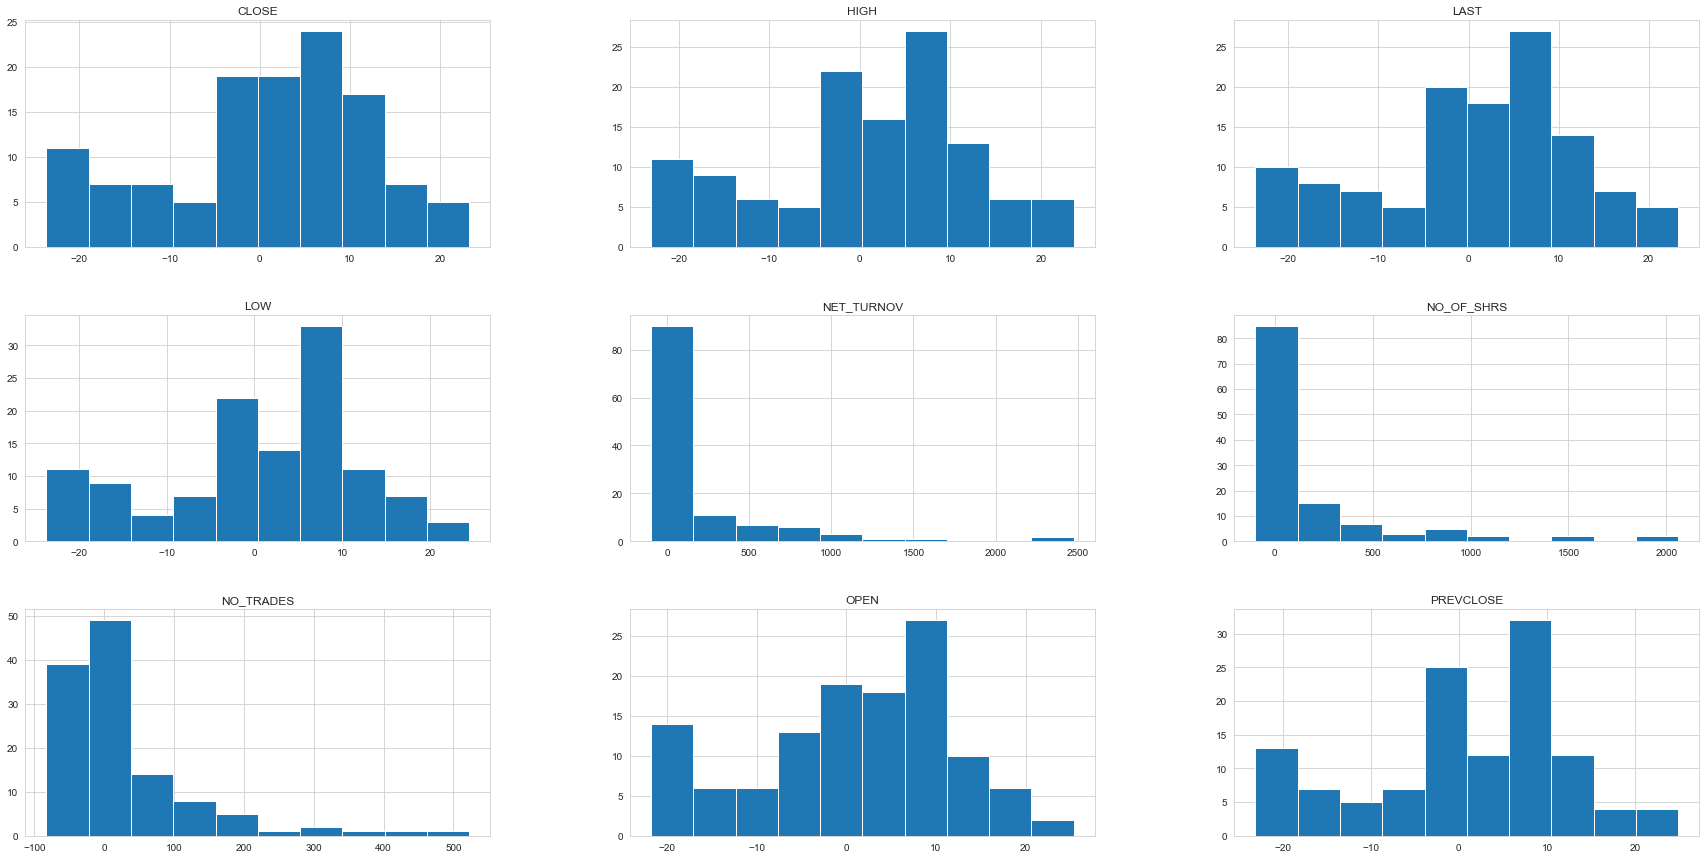

In [64]:
PercentChange.hist(figsize=(30,15))

## 9) Moving Windows

In [65]:
# Isolate the closing prices 
close_px = Company_x['CLOSE']

# Calculate the moving average
moving_avg = close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

date
2019-05-28    1392.12750
2019-06-28    1401.16375
2019-01-29    1399.67500
2019-03-29    1393.87250
2019-05-29    1402.23375
2019-01-30    1400.42750
2019-04-30    1401.46500
2019-05-30    1401.77625
2019-01-31    1401.73625
2019-05-31    1409.76875
Name: CLOSE, dtype: float64

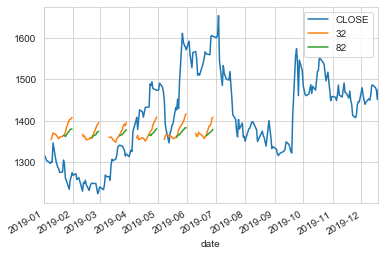

In [102]:
# Short moving window rolling mean
Company_x['32'] = close_px.rolling(window=32).mean()

# Long moving window rolling mean
Company_x['82'] = close_px.rolling(window=82).mean()

# Plot the closing price, the short and long windows of rolling means
Company_x[['CLOSE', '32', '82']].plot()

plt.show()

## 10) Volatility Calculation Plot
    Volatility is the degree of variation of a trading price series over time. Measured by the standard deviation of logarithmic returns. The higher the volatility, the riskier the security.

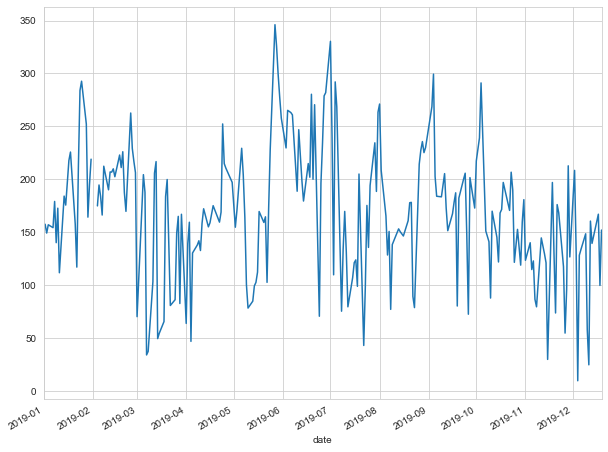

In [96]:
# Define the minumum of periods to consider 
min_periods = 3

# Calculate the volatility
vol = Company_x["CLOSE"].rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [97]:
vol

date
2019-01-01           NaN
2019-02-01           NaN
2019-03-01     70.211235
2019-04-01     63.828305
2019-07-01    330.339337
                 ...    
2019-10-30    159.737590
2019-01-31    219.007003
2019-05-31    257.685016
2019-07-31    263.447466
2019-10-31    180.753472
Name: CLOSE, Length: 238, dtype: float64

## 11) Compound Annual Growth Rate

In [68]:
start_date = date(day=1,month=1,year=2019)
end_date = date(day=31,month=12,year=2019)

In [69]:
one_year_data = rslt_df[(start_date <= rslt_df['date']) & (rslt_df['date'] <= end_date) ]

In [70]:
one_year_data

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE,SC_CODE,SC_GROUP,SC_NAME,SC_TYPE,TDCLOINDI,date
date,,,,,,,,,,,,,,,
2019-01-01,1320.40,1338.75,1323.55,1312.55,2407362.0,1816,255,1318.20,1332.00,500002,A,ABB LTD.,Q,NaN,2019-01-01
2019-01-01,203.90,205.70,203.90,200.60,1150504.0,5672,294,204.75,204.20,500003,A,AEGIS LOGIS,Q,NaN,2019-01-01
2019-01-01,739.65,747.50,739.65,737.60,5424260.0,7307,253,743.45,742.75,500008,A,AMAR RAJA BA,Q,NaN,2019-01-01
2019-01-01,2009.60,2018.60,2009.60,1956.00,630395875.0,320697,2531,1973.55,1970.00,500010,A,HDFC,Q,NaN,2019-01-01
2019-01-01,3448.60,3548.00,3443.00,3416.45,9821508.0,2837,651,3548.00,3430.35,500027,A,ATUL LTD.,Q,NaN,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,3196.50,3240.00,3196.50,3183.00,52730878.0,16414,2538,3240.00,3232.50,541729,A,HDFCAMC,Q,NaN,2019-12-31
2019-12-31,1976.90,2000.00,2000.00,1916.35,13567223.0,6916,1223,1916.35,1923.35,541988,A,AAVAS,Q,NaN,2019-12-31
2019-12-31,162.70,164.30,162.70,155.50,59404969.0,367732,5165,155.50,155.75,542066,A,ADANIGAS,Q,NaN,2019-12-31


In [71]:
Company_x = one_year_data[one_year_data['SC_NAME']=='ABB LTD.    ']

In [72]:
Company_x = Company_x.drop(["SC_CODE","SC_GROUP","SC_TYPE","TDCLOINDI","SC_NAME","date"],axis=1)

In [73]:
Company_x.shape

(238, 9)

In [115]:
# Get the number of days in `ABB LTD`
days = (Company_x.index[-1] - Company_x.index[0]).days

# Calculate the Compound Annual Growth Rate 
cagr = ((((Company_x['CLOSE'][-1]) / Company_x['CLOSE'][1])) ** (365.0/days)) - 1

# Print CAGR
print("Compound Annual Growth Rate: "+str(cagr)) 

Compound Annual Growth Rate: 0.1822072697867958


## 12) Common Financial Analysis

### Returns

In [75]:
daily_close = Company_x[['CLOSE']]

In [76]:
daily_close

,CLOSE
date,
2019-01-01,1320.40
2019-02-01,1268.55
2019-03-01,1240.50
2019-04-01,1313.55
2019-07-01,1601.25
...,...
2019-10-30,1448.35
2019-01-31,1274.90
2019-05-31,1571.00


In [77]:
#Daily returns
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)

In [103]:
daily_pct_c

,CLOSE
date,
2019-01-01,NaN
2019-02-01,-0.039268
2019-03-01,-0.022112
2019-04-01,0.058888
2019-07-01,0.219025
...,...
2019-10-30,-0.047765
2019-01-31,-0.119757
2019-05-31,0.232254


In [79]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

In [80]:
daily_log_returns

,CLOSE
date,
2019-01-01,NaN
2019-02-01,-0.040060
2019-03-01,-0.022360
2019-04-01,0.057219
2019-07-01,0.198051
...,...
2019-10-30,-0.048943
2019-01-31,-0.127557
2019-05-31,0.208845


In [104]:
# Resample `Company_x` to business months, take last observation as value 
monthly = Company_x.resample('BM').apply(lambda x: x[-1])

In [82]:
# Calculate the monthly percentage change
monthly.pct_change()

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
date,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,-0.035258,-0.040793,-0.034917,-0.024462,12.418339,12.938858,-0.545455,-0.029168,-0.031332
2019-03-29,0.073092,0.075739,0.073092,0.069999,-0.019291,-0.087578,4.296000,0.082715,0.074083
2019-04-30,0.116339,0.119315,0.116339,0.120954,-0.575698,-0.620125,-0.785498,0.113031,0.123574
2019-05-31,0.066241,0.070234,0.066241,0.063502,3.611666,3.326613,0.778169,0.071581,0.068325
2019-06-28,0.020592,0.016501,0.021642,0.019562,-0.812157,-0.816016,0.263366,0.008303,0.017105
2019-07-31,-0.150186,-0.151258,-0.151059,-0.158424,-0.648434,-0.585140,-0.211599,-0.148403,-0.152387
2019-08-30,-0.018128,-0.014208,-0.020696,-0.009067,0.893945,0.928846,-0.194831,-0.011029,-0.020429
2019-09-30,0.136899,0.134035,0.139881,0.130549,-0.761700,-0.790220,0.214815,0.135762,0.159602


In [83]:
# Resample `Company_X` to quarters, take the mean as value per quarter
quarter = Company_x.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
date,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,0.051889,0.049784,0.053333,0.048809,0.304680,0.232821,0.100851,0.045938,0.047005
2019-09-30,0.068467,0.074701,0.067532,0.066018,-0.267042,-0.327718,0.097557,0.073057,0.071846
2020-01-31,0.013860,0.010863,0.014538,0.017980,-0.493582,-0.494373,-0.013479,0.015894,0.013993


In [84]:
monthly

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
date,,,,,,,,,
2019-01-31,1274.90,1287.00,1274.45,1255.00,7278639.0,5708,550,1263.35,1263.90
2019-02-28,1229.95,1234.50,1229.95,1224.30,97667248.0,79563,250,1226.50,1224.30
2019-03-29,1319.85,1328.00,1319.85,1310.00,95783140.0,72595,1324,1327.95,1315.00
2019-04-30,1473.40,1486.45,1473.40,1468.45,40640961.0,27577,284,1478.05,1477.50
2019-05-31,1571.00,1590.85,1571.00,1561.70,187422520.0,119315,505,1583.85,1578.45
2019-06-28,1603.35,1617.10,1605.00,1592.25,35206009.0,21952,638,1597.00,1605.45
2019-07-31,1362.55,1372.50,1362.55,1340.00,12377243.0,9107,503,1360.00,1360.80
2019-08-30,1337.85,1353.00,1334.35,1327.85,23441813.0,17566,405,1345.00,1333.00
2019-09-30,1521.00,1534.35,1521.00,1501.20,5586174.0,3685,492,1527.60,1545.75


In [85]:
quarter

,CLOSE,HIGH,LAST,LOW,NET_TURNOV,NO_OF_SHRS,NO_TRADES,OPEN,PREVCLOSE
date,,,,,,,,,
2019-01-31,1290.004348,1309.173913,1288.554348,1278.189130,2.053205e+07,16043.043478,586.739130,1295.752174,1292.486957
2019-05-31,1356.941875,1374.349375,1357.276250,1340.576875,2.678775e+07,19778.200000,645.912500,1355.276250,1353.240625
2019-09-30,1449.848148,1477.014815,1448.936420,1429.079630,1.963431e+07,13296.518519,708.925926,1454.288889,1450.465432
2020-01-31,1469.942593,1493.059259,1470.000926,1454.775000,9.943174e+06,6723.074074,699.370370,1477.403704,1470.761111


In [86]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

               CLOSE
date                
2019-01-01       NaN
2019-02-01 -0.039268
2019-03-01 -0.022112
2019-04-01  0.058888
2019-07-01  0.219025
...              ...
2019-10-30 -0.047765
2019-01-31 -0.119757
2019-05-31  0.232254
2019-07-31 -0.132686
2019-10-31  0.069796

[238 rows x 1 columns]


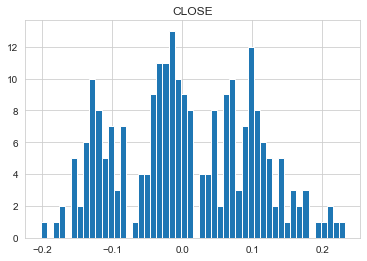

            CLOSE
count  237.000000
mean     0.004968
std      0.095657
min     -0.202516
25%     -0.059636
50%     -0.003253
75%      0.085347
max      0.232254


In [87]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [88]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

               CLOSE
date                
2019-01-01       NaN
2019-02-01  0.960732
2019-03-01  0.939488
2019-04-01  0.994812
2019-07-01  1.212701
...              ...
2019-10-30  1.096902
2019-01-31  0.965541
2019-05-31  1.189791
2019-07-31  1.031922
2019-10-31  1.103946

[238 rows x 1 columns]


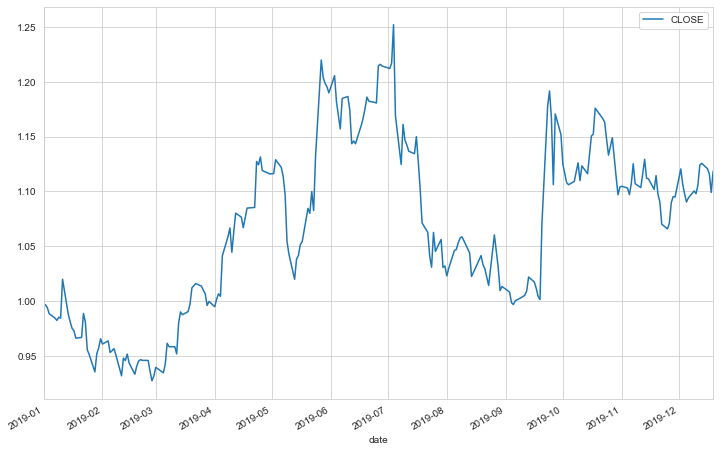

In [89]:
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [90]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

               CLOSE
date                
2019-01-31  0.975934
2019-02-28  0.945573
2019-03-31  0.981248
2019-04-30  1.068026
2019-05-31  1.107560
2019-06-30  1.178915
2019-07-31  1.118228
2019-08-31  1.035518
2019-09-30  1.058527
2019-10-31  1.130396
2019-11-30  1.099547
2019-12-31  1.108352


## 13) Maximum Drawdown

In [92]:
Roll_Max = Company_x['CLOSE'].cummax()
Daily_Drawdown = Company_x['CLOSE']/Roll_Max - 1.0
Max_DD = Daily_Drawdown.cummin()

print("Daily_Drawdown: ") 
print(Daily_Drawdown)
print()


Daily_Drawdown: 
date
2019-01-01    0.000000
2019-02-01   -0.039268
2019-03-01   -0.060512
2019-04-01   -0.005188
2019-07-01    0.000000
                ...   
2019-10-30   -0.123911
2019-01-31   -0.228829
2019-05-31   -0.049722
2019-07-31   -0.175811
2019-10-31   -0.118286
Name: CLOSE, Length: 238, dtype: float64



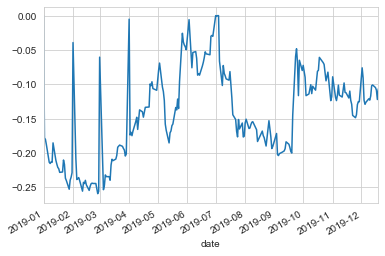

In [93]:
Daily_Drawdown.plot()

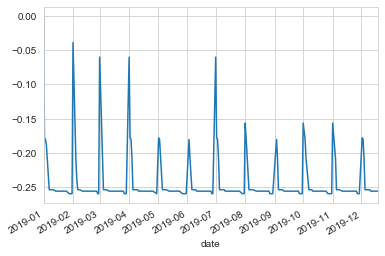

In [94]:
Max_DD.plot()

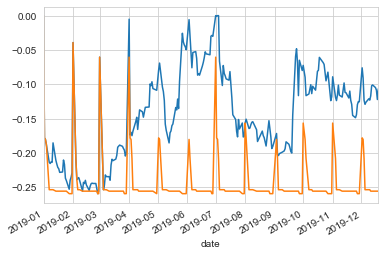

In [95]:
#Roll_Max.plot()
Daily_Drawdown.plot()
Max_DD.plot()
plt.show()